# Module 11 Challenge
## Deliverable 2: Scrape and Analyse Mars Weather Data

In [1]:
pip install Selenium

Note: you may need to restart the kernel to use updated packages.


In [28]:

# Import Splinter and BeautifulSoup
from splinter import Browser
from bs4 import BeautifulSoup
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
browser = Browser('chrome')

### Step 1: Visit the Website

Use automated browsing to visit the [Mars Temperature Data Site](https://static.bc-edx.com/data/web/mars_facts/temperature.html). Inspect the page to identify which elements to scrape.

   > **Hint** To identify which elements to scrape, you might want to inspect the page by using Chrome DevTools to discover whether the table contains usable classes.


In [5]:
# Visit the website
url = 'https://static.bc-edx.com/data/web/mars_facts/temperature.html'
browser.visit(url)

### Step 2: Scrape the Table

Create a Beautiful Soup object and use it to scrape the data in the HTML table.

Note that this can also be achieved by using the Pandas `read_html` function. However, use Beautiful Soup here to continue sharpening your web scraping skills.

In [6]:
# Create a Beautiful Soup Object
html = browser.html
soup = BeautifulSoup(html, 'html.parser')

In [7]:
# Extract all rows of data
table = soup.find('table')


### Step 3: Store the Data

Assemble the scraped data into a Pandas DataFrame. The columns should have the same headings as the table on the website. Here’s an explanation of the column headings:

* `id`: the identification number of a single transmission from the Curiosity rover
* `terrestrial_date`: the date on Earth
* `sol`: the number of elapsed sols (Martian days) since Curiosity landed on Mars
* `ls`: the solar longitude
* `month`: the Martian month
* `min_temp`: the minimum temperature, in Celsius, of a single Martian day (sol)
* `pressure`: The atmospheric pressure at Curiosity's location

In [8]:
# Create an empty list
mars_list = []

# Loop through the scraped data to create a list of rows

table = soup.find('table')
rows = table.find_all('tr')

for row in rows:
  
    cells = row.find_all('td')
    row_data = [cell.get_text(strip=True) for cell in cells]
    
    # Append the row to the mars_list
    mars_list.append(row_data)


In [12]:
# Create a Pandas DataFrame by using the list of rows and a list of the column names

# Creating column names as per the instructions
column_names = ['id', 'terrestrial_date', 'sol', 'ls', 'month', 'min_temp', 'pressure']

# Create dataframe
df = pd.DataFrame(mars_list, columns=column_names)

# Print Mars dataframe
print(df)

        id terrestrial_date   sol    ls month min_temp pressure
0     None             None  None  None  None     None     None
1        2       2012-08-16    10   155     6    -75.0    739.0
2       13       2012-08-17    11   156     6    -76.0    740.0
3       24       2012-08-18    12   156     6    -76.0    741.0
4       35       2012-08-19    13   157     6    -74.0    732.0
...    ...              ...   ...   ...   ...      ...      ...
1863  1889       2018-02-23  1973   133     5    -78.0    730.0
1864  1892       2018-02-24  1974   134     5    -77.0    729.0
1865  1894       2018-02-25  1975   134     5    -76.0    729.0
1866  1893       2018-02-26  1976   135     5    -77.0    728.0
1867  1895       2018-02-27  1977   135     5    -77.0    727.0

[1868 rows x 7 columns]


In [13]:
# Confirm DataFrame was created successfully
# Removed the first row of data with no meaningful information
df = df.drop(0)
df

,id,terrestrial_date,sol,ls,month,min_temp,pressure
1,2,2012-08-16,10,155,6,-75.0,739.0
2,13,2012-08-17,11,156,6,-76.0,740.0
3,24,2012-08-18,12,156,6,-76.0,741.0
4,35,2012-08-19,13,157,6,-74.0,732.0
5,46,2012-08-20,14,157,6,-74.0,740.0
...,...,...,...,...,...,...,...
1863,1889,2018-02-23,1973,133,5,-78.0,730.0
1864,1892,2018-02-24,1974,134,5,-77.0,729.0
1865,1894,2018-02-25,1975,134,5,-76.0,729.0
1866,1893,2018-02-26,1976,135,5,-77.0,728.0


### Step 4: Prepare Data for Analysis

Examine the data types that are currently associated with each column. If necessary, cast (or convert) the data to the appropriate `datetime`, `int`, or `float` data types.

  > **Hint** You can use the Pandas `astype` and `to_datetime` methods to accomplish this task.


In [14]:
# Examine data type of each column
data_types = df.dtypes

print(data_types)

id                  object
terrestrial_date    object
sol                 object
ls                  object
month               object
min_temp            object
pressure            object
dtype: object


In [15]:
# Change data types for data analysis
df['id'] = df['id'].astype(str)  
df['terrestrial_date'] = pd.to_datetime(df['terrestrial_date'])  
df['sol'] = df['sol'].astype(int)  
df['ls'] = df['ls'].astype(int) 
df['month'] = df['month'].astype(int)  
df['min_temp'] = df['min_temp'].astype(float)  
df['pressure'] = df['pressure'].astype(float) 

In [16]:
# Confirm type changes were successful by examining data types again
data_types = df.dtypes

print(data_types)

id                          object
terrestrial_date    datetime64[ns]
sol                          int32
ls                           int32
month                        int32
min_temp                   float64
pressure                   float64
dtype: object


### Step 5: Analyse the Data

Analyse your dataset by using Pandas functions to answer the following questions:

1. How many months exist on Mars?
2. How many Martian (and not Earth) days worth of data exist in the scraped dataset?
3. What are the coldest and the warmest months on Mars (at the location of Curiosity)? To answer this question:
    * Find the average the minimum daily temperature for all of the months.
    * Plot the results as a bar chart.
4. Which months have the lowest and the highest atmospheric pressure on Mars? To answer this question:
    * Find the average the daily atmospheric pressure of all the months.
    * Plot the results as a bar chart.
5. About how many terrestrial (Earth) days exist in a Martian year? To answer this question:
    * Consider how many days elapse on Earth in the time that Mars circles the Sun once.
    * Visually estimate the result by plotting the daily minimum temperature.


In [17]:
# 1. How many months are there on Mars?
month_counts = df['month'].value_counts().sort_index()
print(month_counts)

1     174
2     178
3     192
4     194
5     149
6     147
7     142
8     141
9     134
10    112
11    138
12    166
Name: month, dtype: int64


In [18]:
# 2. How many Martian days' worth of data are there?
martian_days = df['terrestrial_date'].nunique()
print(martian_days)

1867


In [19]:
# 3. What is the average low temperature by month?
average_monthly_low_temp = df.groupby('month')['min_temp'].mean()
print(average_monthly_low_temp)

month
1    -77.160920
2    -79.932584
3    -83.307292
4    -82.747423
5    -79.308725
6    -75.299320
7    -72.281690
8    -68.382979
9    -69.171642
10   -71.982143
11   -71.985507
12   -74.451807
Name: min_temp, dtype: float64


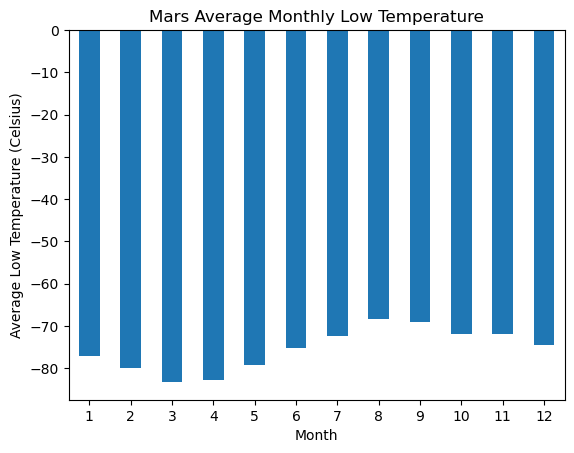

In [29]:
# Plot the average temperature by month
average_monthly_low_temp.plot(kind='bar')

# Formatting the graph
plt.title('Mars Average Monthly Low Temperature')
plt.xlabel('Month')
plt.ylabel('Average Low Temperature (Celsius)')
plt.xticks(rotation=0)  

# Show the results
plt.show()

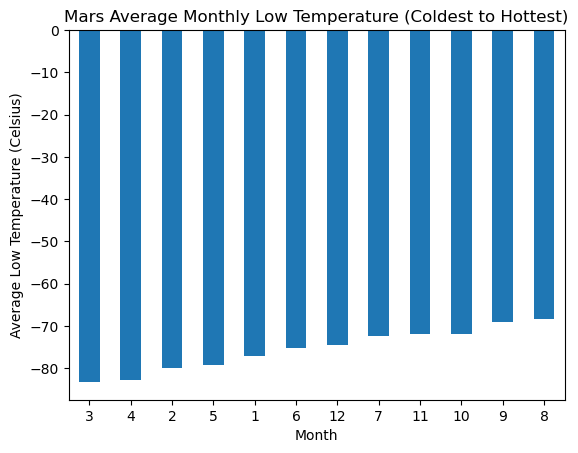

In [30]:
# Identify the coldest and hottest months in Curiosity's location

# Calculate the average monthly low temperature
average_monthly_low_temp = df.groupby('month')['min_temp'].mean()

# Sort the data in descending order of average low temperature
average_monthly_low_temp_coldest = average_monthly_low_temp.sort_values(ascending=True)

# Plot the sorted data
average_monthly_low_temp_coldest.plot(kind='bar')

# Customize the plot
plt.title('Mars Average Monthly Low Temperature (Coldest to Hottest)')
plt.xlabel('Month')
plt.ylabel('Average Low Temperature (Celsius)')
plt.xticks(rotation=0)  

# Show the plot
plt.show()


In [31]:
# 4. Average pressure by Martian month
average_monthly_pressure = df.groupby('month')['pressure'].mean()
print(average_monthly_pressure)

month
1     862.488506
2     889.455056
3     877.322917
4     806.329897
5     748.557047
6     745.054422
7     795.105634
8     873.829787
9     913.305970
10    887.312500
11    857.014493
12    842.156627
Name: pressure, dtype: float64


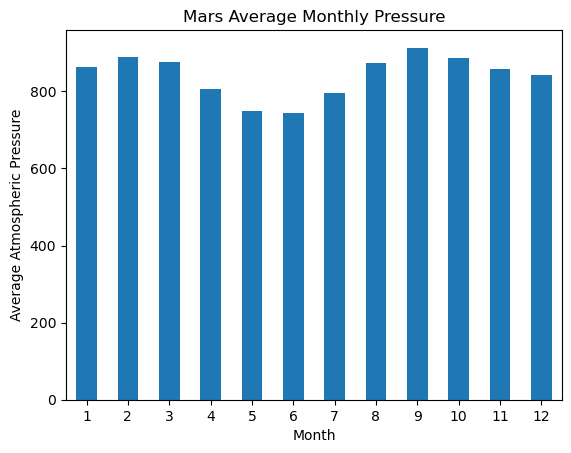

In [32]:
# Plot the average pressure by month
average_monthly_pressure.plot(kind='bar')

# Formatting the graph
plt.title('Mars Average Monthly Pressure')
plt.xlabel('Month')
plt.ylabel('Average Atmospheric Pressure')
plt.xticks(rotation=0)  

# Show the results
plt.show()

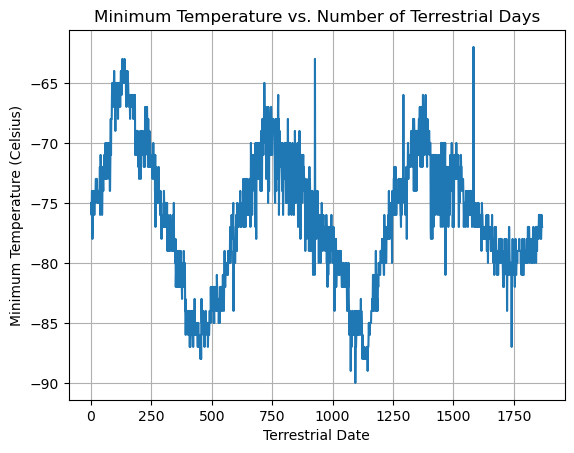

In [33]:
# 5. How many terrestrial (earth) days are there in a Martian year?

plt.plot(df.index, df['min_temp'])

# Customizing the plot
plt.title('Minimum Temperature vs. Number of Terrestrial Days')
plt.xlabel('Terrestrial Date')
plt.ylabel('Minimum Temperature (Celsius)')
plt.grid(True)

# Showing the plot
plt.show()

On average, the third month has the coldest minimum temperature on Mars, and the eighth month is the warmest. But it is always very cold there in human terms!



Atmospheric pressure is, on average, lowest in the sixth month and highest in the ninth.

The distance from peak to peak is roughly 1425-750, or 675 days. A year on Mars appears to be about 675 days from the plot. Internet search confirms that a Mars year is equivalent to 687 earth days.

### Step 6: Save the Data

Export the DataFrame to a CSV file.

In [35]:
# Write the data to a CSV
df.to_csv("part_2_mars_weather_dataframe.csv",index=False)

In [36]:
browser.quit()